# Plot effects of dicodon length and periodicity on mRNA levels

## Load libraries and define analysis-specific parameters

- We need to install both rsample and rasilabRtemplates in the Docker / Singularity container (or R conda environement?)

In [47]:
library(Biostrings)
library(tidyverse)
library(rasilabRtemplates)

insert_reads_cutoff <- 200 # The insert should get at least 200 reads across gRNA or mRNA
n_barcodes_cutoff <- 6 # The insert should have at least 6 barcodes across gRNA and mRNA after above cutoff

# Color-blind friendly palette. See http://www.cookbook-r.com/Graphs/Colors_(ggplot2)/
cbPalette <- c("#999999", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")

## Read back barcode counts 

This is calculated in [plot_alignment_statistics.ipynb](plot_alignment_statistics.md).

In [48]:
barcode_counts <- read_tsv('../tables/sample_insert_barcode_counts.tsv.gz') %>% 
  print()

Rows: 67986 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (4): sample_id, sample_name, library_type, linkage_ref
dbl (4): insert_num, barcode_num, barcode_count, linkage_count

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 67,986 × 8
   sample_id sample_name insert_num barcode_num barcode_count linkage_count
   <chr>     <chr>            <dbl>       <dbl>         <dbl>         <dbl>
 1 107p7     didi_grna_1         86       23374          4582            26
 2 107p7     didi_grna_1         54       22034          3821            25
 3 107p7     didi_grna_1        150       25702          3797            29
 4 107p7     didi_grna_1         90       16901          3778            20
 5 107p7     didi_grna_1        227        2082          3694            11
 6 107p7     didi_grna_1         85       35422          3587            68
 7 107p7     didi_grna_1         35       34631          3431            56
 8 107p7     didi_grna_1        218       35803          3412           178
 9 107p7     didi_grna_1        165       18250          3393            21
10 107p7     didi_grna_1         64        3780          3114            12
# … with 67,976 more rows, and 2 more variables: library_type <ch

In [49]:
replicate_annotations <- read_csv("../annotations/replicate_annotations.csv") %>% 
  select(sample_num, sample_name, sample_type, replicate) %>% 
  print()

Rows: 4 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): sample_id, illumina_index, sample_name, sample_type, linkage_ref
dbl (2): replicate, sample_num

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 4 × 4
  sample_num sample_name sample_type replicate
       <dbl> <chr>       <chr>           <dbl>
1          1 didi_grna_1 grna                1
2          2 didi_grna_2 grna                2
3          3 didi_mrna_1 mrna                1
4          4 didi_mrna_2 mrna                2



## Read insert annotations 

In [50]:

insert_annotations <- read_tsv("../../pool2_linkage/annotations/insert_annotations.tsv") %>% 
  arrange(insert_num) %>%
  print()

Rows: 317 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): seq, insert_name
dbl (1): insert_num

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 317 × 3
   insert_num seq                                              insert_name      
        <dbl> <chr>                                            <chr>            
 1          0 AAGATCTCCGGCTCCGGCTCCGGCTCCGGCTCCGGCTCCGGCTCCGGC varydicodonrepea…
 2          1 AAGATCAAGATCTCCGGCTCCGGCTCCGGCTCCGGCTCCGGCTCCGGC varydicodonrepea…
 3          2 AAGATCAAGATCAAGATCTCCGGCTCCGGCTCCGGCTCCGGCTCCGGC varydicodonrepea…
 4          3 AAGATCAAGATCAAGATCAAGATCTCCGGCTCCGGCTCCGGCTCCGGC varydicodonrepea…
 5          4 AAGATCAAGATCAAGATCAAGATCAAGATCTCCGGCTCCGGCTCCGGC varydicodonrepea…
 6          5 AAGATCAAGATCAAGATCAAGATCAAGATCAAGATCTCCGGCTCCGGC varydicodonrepea…
 7          6 AAGATCAAGATCAAGATCAAGATCAAGATCAAGATCAAGATCTCCGGC varydicodonrepea…
 8          7 AAGATCAAGATCAAGATCAAGATCAAGATCAAGATCAAGATCAAGATC varydicodonrepea…
 9          8 AAGTTCTCCGGCTCCGGCTCCGGCTCCGGCTCCGGCTCCGGCTCCGGC varydicodonrepea…
10          9 AAGTTCAAGTTCTCCGGCTCCGGCTCCGGCTCCGGCTCCGGCTCCGGC varydicodonrepea…
# … with

## Combine counts and annotations

In [51]:
counts <- barcode_counts %>% 
  left_join(replicate_annotations, by  = "sample_name") %>% 
  left_join(insert_annotations, by = "insert_num") %>% 
  print()

counts

# A tibble: 67,986 × 13
   sample_id sample_name insert_num barcode_num barcode_count linkage_count
   <chr>     <chr>            <dbl>       <dbl>         <dbl>         <dbl>
 1 107p7     didi_grna_1         86       23374          4582            26
 2 107p7     didi_grna_1         54       22034          3821            25
 3 107p7     didi_grna_1        150       25702          3797            29
 4 107p7     didi_grna_1         90       16901          3778            20
 5 107p7     didi_grna_1        227        2082          3694            11
 6 107p7     didi_grna_1         85       35422          3587            68
 7 107p7     didi_grna_1         35       34631          3431            56
 8 107p7     didi_grna_1        218       35803          3412           178
 9 107p7     didi_grna_1        165       18250          3393            21
10 107p7     didi_grna_1         64        3780          3114            12
# … with 67,976 more rows, and 7 more variables: library_type <c

sample_id,sample_name,insert_num,barcode_num,barcode_count,linkage_count,library_type,linkage_ref,sample_num,sample_type,replicate,seq,insert_name
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>
107p7,didi_grna_1,86,23374,4582,26,grna,didi_linkage_1,1,grna,1,CGTGAACGTGAACGTGAACGTGAACGTGAACGTGAACGTGAATCCGGC,varydicodonrepeatlength_CGTGAA_7
107p7,didi_grna_1,54,22034,3821,25,grna,didi_linkage_1,1,grna,1,ATGATGATGATGATGATGATGATGATGATGATGATGATGATGTCCGGC,varydicodonrepeatlength_ATGATG_7
107p7,didi_grna_1,150,25702,3797,29,grna,didi_linkage_1,1,grna,1,TTGATGTTGATGTTGATGTTGATGTTGATGTTGATGTTGATGTCCGGC,varydicodonrepeatlength_TTGATG_7
107p7,didi_grna_1,90,16901,3778,20,grna,didi_linkage_1,1,grna,1,CTCATACTCATACTCATATCCGGCTCCGGCTCCGGCTCCGGCTCCGGC,varydicodonrepeatlength_CTCATA_3
107p7,didi_grna_1,227,2082,3694,11,grna,didi_linkage_1,1,grna,1,CGCCATTTCAGTCGCCATTTCAGTCGCCATTTCAGTCGCCATTTCAGT,mixdicodons_CGCCAT_TTCAGT_1
107p7,didi_grna_1,85,35422,3587,68,grna,didi_linkage_1,1,grna,1,CGTGAACGTGAACGTGAACGTGAACGTGAACGTGAATCCGGCTCCGGC,varydicodonrepeatlength_CGTGAA_6
107p7,didi_grna_1,35,34631,3431,56,grna,didi_linkage_1,1,grna,1,AGTTTCAGTTTCAGTTTCAGTTTCTCCGGCTCCGGCTCCGGCTCCGGC,varydicodonrepeatlength_AGTTTC_4
107p7,didi_grna_1,218,35803,3412,178,grna,didi_linkage_1,1,grna,1,CGCCATAGTTTCCGCCATAGTTTCCGCCATAGTTTCCGCCATAGTTTC,mixdicodons_CGCCAT_AGTTTC_1
107p7,didi_grna_1,165,18250,3393,21,grna,didi_linkage_1,1,grna,1,TTTTGTTTTTGTTTTTGTTTTTGTTTTTGTTTTTGTTCCGGCTCCGGC,varydicodonrepeatlength_TTTTGT_6


### Plot correlation between mRNA and gDNA counts for all inserts in both samples


`summarise()` has grouped output by 'insert_num'. You can override using the `.groups` argument.


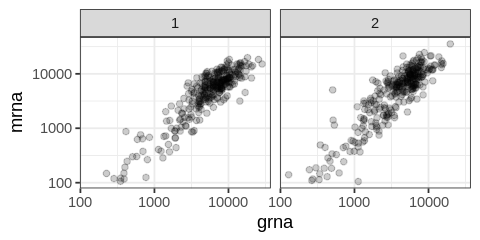

In [52]:
options(repr.plot.width=4, repr.plot.height=2)

counts %>% 
  select(barcode_num, sample_type, replicate, barcode_count, insert_num) %>%
  pivot_wider(names_from = sample_type, values_from = barcode_count) %>%
  drop_na() %>%
  filter(grna > 100, mrna > 100) %>% 
  group_by(insert_num, replicate) %>%
  arrange(-(grna + mrna)) %>%
  # This selects the number of barcodes for each sample
  # slice(1:3) %>%
  summarize(grna = sum(grna), mrna = sum(mrna)) %>% 
  ungroup() %>%
  arrange(insert_num, replicate) %>%
  ggplot(aes(x = grna, y = mrna)) +
  facet_wrap(~ replicate) +
  geom_point(alpha = 0.2) +
  scale_x_log10() +
  scale_y_log10() +
  theme_bw()

## Function for bootstrap mRNA levels

In [53]:
calc_lfc_bootstrap <- function(data, indices) {
  d <- data[indices,]
  log2(sum(d$mrna)) - log2(sum(d$grna))
}

## Calculate mRNA levels for each insert

- Calculate lfc and standard deviation using the bootstrapping function above

In [54]:
lfc <- counts %>% 
  select(barcode_num, sample_type, replicate, barcode_count, insert_num) %>% 
  pivot_wider(names_from = sample_type, values_from = barcode_count) %>%
  drop_na() %>%
  group_by(insert_num, replicate) %>% 
  nest() %>%

  mutate(lfc_boot = map(data, function(df) boot::boot(data=df, statistic=calc_lfc_bootstrap, R=100)$t)) %>% 

  select(-data) %>%
  mutate(lfc = map_dbl(lfc_boot, mean)) %>%
  mutate(lfc_sd = map_dbl(lfc_boot, sd)) %>%
  select(-lfc_boot) %>%
  group_by(replicate) %>%
  mutate(lfc = lfc - median(lfc)) %>%
  ungroup() %>%
  print()


# A tibble: 634 × 4
   replicate insert_num     lfc lfc_sd
       <dbl>      <dbl>   <dbl>  <dbl>
 1         1         86 -0.181   0.305
 2         1         54  0.0767  0.558
 3         1        150  0.806   0.377
 4         1         90 -0.127   0.464
 5         1        227  0.178   0.489
 6         1         85  0.340   0.299
 7         1         35  0.190   0.293
 8         1        218  0.222   0.596
 9         1        165  0.656   0.415
10         1         64  0.322   0.436
# … with 624 more rows


## Compare insert mRNA level effects of the two replicates

# A tibble: 317 × 3
   insert_num   lfc_1   lfc_2
        <dbl>   <dbl>   <dbl>
 1         86 -0.181   0.197 
 2         54  0.0767  1.42  
 3        150  0.806   0.344 
 4         90 -0.127   1.14  
 5        227  0.178   0.148 
 6         85  0.340  -0.718 
 7         35  0.190  -0.516 
 8        218  0.222   0.0945
 9        165  0.656   0.223 
10         64  0.322   0.562 
# … with 307 more rows


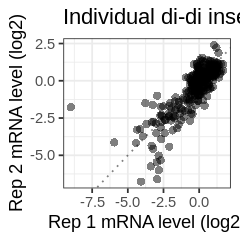

In [55]:
options(repr.plot.width=2, repr.plot.height=2)

plot_data <- lfc %>% 
  select(insert_num, replicate, lfc) %>% 
  pivot_wider(names_from = replicate, values_from = lfc, names_prefix = "lfc_") %>%
  print()

plot_data %>% 
  ggplot(aes(x = lfc_1, y = lfc_2)) +
  geom_point(alpha = 0.5, shape = 16, size = 2)  +
  geom_abline(slope = 1, linetype = "dotted", alpha = 0.5) +
  labs(x = "Rep 1 mRNA level (log2)", y = "Rep 2 mRNA level (log2)",
       title = "Individual di-di inserts") +
  theme_bw() 

## Which inserts have lowest mRNA levels?

In [56]:
insert_lfc <- lfc %>% 
  left_join(insert_annotations, by = "insert_num") %>% 
  group_by(insert_num) %>% 
  mutate(mean_lfc = mean(lfc)) %>% 
  ungroup() %>% 
  arrange(mean_lfc) %>% 
  select(-insert_num) %>% 
  mutate(insert = as.character(translate(DNAStringSet(seq), no.init.codon = T))) %>% 
  write_tsv("../tables/insert_mrna_lfc.tsv.gz")

insert_lfc

replicate,lfc,lfc_sd,seq,insert_name,mean_lfc,insert
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>
1,-4.081506,1.08335322,CGCCATCGCCATCGCCATCGCCATCGCCATCGCCATCGCCATCGCCAT,varydicodonrepeatlength_CGCCAT_8,-5.422316,RHRHRHRHRHRHRHRH
2,-6.763126,1.05579232,CGCCATCGCCATCGCCATCGCCATCGCCATCGCCATCGCCATCGCCAT,varydicodonrepeatlength_CGCCAT_8,-5.422316,RHRHRHRHRHRHRHRH
1,-8.992351,0.00000000,TAATGATAATGATAATGATAATGATAATGATAATGATAATGATAATGA,stop_control,-5.378349,****************
2,-1.764348,0.08555056,TAATGATAATGATAATGATAATGATAATGATAATGATAATGATAATGA,stop_control,-5.378349,****************
1,-5.951838,1.70309417,TACAAGTACAAGTACAAGTACAAGTACAAGTACAAGTCCGGCTCCGGC,varydicodonrepeatlength_TACAAG_6,-5.043216,YKYKYKYKYKYKSGSG
2,-4.134594,1.32528425,TACAAGTACAAGTACAAGTACAAGTACAAGTACAAGTCCGGCTCCGGC,varydicodonrepeatlength_TACAAG_6,-5.043216,YKYKYKYKYKYKSGSG
1,-2.948867,1.24332547,AAGATCAAGATCAAGATCAAGATCAAGATCAAGATCAAGATCAAGATC,varydicodonrepeatlength_AAGATC_8,-4.774230,KIKIKIKIKIKIKIKI
2,-6.599594,1.69868632,AAGATCAAGATCAAGATCAAGATCAAGATCAAGATCAAGATCAAGATC,varydicodonrepeatlength_AAGATC_8,-4.774230,KIKIKIKIKIKIKIKI
1,-3.395448,0.66086561,TACAAGTACAAGTACAAGTACAAGTACAAGTACAAGTACAAGTACAAG,varydicodonrepeatlength_TACAAG_8,-4.569377,YKYKYKYKYKYKYKYK


## How does mRNA level vary with dicodon repeat length?

# A tibble: 168 × 8
   replicate     lfc lfc_sd seq             dicodon repeat_length mean_lfc diaa 
       <dbl>   <dbl>  <dbl> <chr>           <chr>   <chr>            <dbl> <fct>
 1         1 -2.95    1.24  AAGATCAAGATCAA… AAGATC  8               -4.77  KI   
 2         1 -1.67    0.551 AAGATCAAGATCAA… AAGATC  7               -1.82  KI   
 3         1 -0.579   0.663 AAGATCAAGATCAA… AAGATC  6               -1.38  KI   
 4         1 -1.01    0.514 AAGATCAAGATCAA… AAGATC  5               -1.51  KI   
 5         1 -0.642   0.361 AAGATCAAGATCAA… AAGATC  4               -0.945 KI   
 6         1  0.273   0.292 AAGATCAAGATCAA… AAGATC  3                0.189 KI   
 7         1 -0.0104  0.310 AAGATCAAGATCTC… AAGATC  2                0.368 KI   
 8         1 -0.367   0.275 AAGATCTCCGGCTC… AAGATC  1                0.373 KI   
 9         1 -2.70    0.473 AAGTTCAAGTTCAA… AAGTTC  8               -2.22  KF   
10         1 -3.04    0.510 AAGTTCAAGTTCAA… AAGTTC  7               -2.95  KF   
# … with

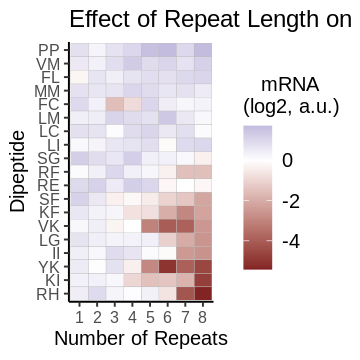

In [57]:
options(repr.plot.width=3, repr.plot.height=3)

plot_data <- insert_lfc %>%
  filter(str_detect(insert_name, "varydicodonrepeatlength")) %>% 
  separate(insert_name, c("insert_type", "dicodon", "repeat_length")) %>% 
  mutate(diaa = as.character(translate(DNAStringSet(dicodon,), no.init.codon = T))) %>% 
  group_by(seq) %>%
  slice(1) %>% 
  ungroup() %>% 
  group_by(diaa) %>%
  mutate(temp = min(mean_lfc[repeat_length == "8"])) %>%
  ungroup() %>%
  mutate(diaa = fct_reorder(diaa, -temp)) %>%
  select(-insert, - insert_type, -temp) %>%
  print()

plot_data %>% 
  ggplot(aes(x = repeat_length, y = fct_rev(diaa), fill = mean_lfc)) +
  geom_tile(color = 'grey') +
  scale_fill_gradient2() +
  labs(x = "Number of Repeats", y = "Dipeptide", fill = "   mRNA\n(log2, a.u.)",
       title = "Effect of Repeat Length on mRNA level")  

## Plot length effects for destabilizing dipeptide only

- set RH8 as lowest for heatmap purposes, since YK6 being lowest is likely suprious. 

# A tibble: 72 × 8
   replicate    lfc lfc_sd seq              dicodon repeat_length mean_lfc diaa 
       <dbl>  <dbl>  <dbl> <chr>            <chr>   <chr>            <dbl> <fct>
 1         1 -3.77   0.828 ATCATCATCATCATC… ATCATC  8              -2.64   II   
 2         1 -2.61   0.621 ATCATCATCATCATC… ATCATC  7              -2.48   II   
 3         1 -0.210  0.504 ATCATCATCATCATC… ATCATC  6              -0.0995 II   
 4         1  0.233  0.481 ATCATCATCATCATC… ATCATC  5               0.102  II   
 5         1  0.232  0.297 ATCATCATCATCATC… ATCATC  4               0.667  II   
 6         1  0.821  0.395 ATCATCATCATCATC… ATCATC  3               0.880  II   
 7         1  0.678  0.348 ATCATCATCATCTCC… ATCATC  2               0.192  II   
 8         1  0.246  0.416 ATCATCTCCGGCTCC… ATCATC  1               0.428  II   
 9         1 -2.70   0.473 AAGTTCAAGTTCAAG… AAGTTC  8              -2.22   KF   
10         1 -3.04   0.510 AAGTTCAAGTTCAAG… AAGTTC  7              -2.95   KF   
# … with 

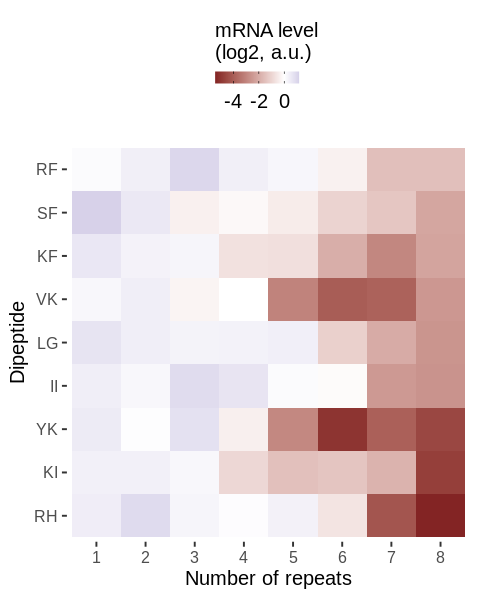

In [76]:
options(repr.plot.width=4, repr.plot.height=5)

plot_data <- insert_lfc %>% 
  filter(str_detect(insert_name, "varydicodonrepeatlength")) %>% 
  separate(insert_name, c("insert_type", "dicodon", "repeat_length")) %>% 
  # we skip these two dicodons and plot them separately since they are peculiar, 
  # they have another synonymous dicodon in this group
  filter(!dicodon %in% c("AGAGAG", "CTCATA")) %>%
  mutate(diaa = as.character(translate(DNAStringSet(dicodon,), no.init.codon = T))) %>% 
  group_by(insert) %>%
  slice(1) %>%
  ungroup() %>%
  group_by(diaa) %>%
  mutate(temp = min(mean_lfc[repeat_length == "8"])) %>%
  ungroup() %>%
  filter(temp < -0.5) %>% 
  mutate(diaa = fct_reorder(diaa, -temp)) %>%
  select(-insert, - insert_type, -temp) %>%
  # mutate(mean_lfc = case_when(mean_lfc < -3.8 ~ -3.8, T ~ mean_lfc)) %>% 
  print()

plot_data %>% 
  complete(diaa, repeat_length) %>% 
  ggplot(aes(x = repeat_length, y = fct_rev(diaa), fill = mean_lfc)) +
  geom_tile() +
  scale_fill_gradient2(breaks = c(0, -2, -4),
                       na.value = "grey50", 
                       guide = guide_colorbar(barwidth = 3.5, barheight = 0.5, ticks.colour = "black", title.position = "top")) +
  labs(x = "Number of repeats", y = "Dipeptide", fill = "mRNA level\n(log2, a.u.)") +
  theme(axis.line = element_blank(), legend.position = "top") 
  
ggsave("../figures/destabilizing_dipeptide_length_effect.pdf", width = 4, height = 5)   

## Show replicability for above plot

# A tibble: 72 × 4
   diaa  repeat_length lfc_1 lfc_2
   <chr> <chr>         <dbl> <dbl>
 1 RH    8             -4.08 -6.76
 2 YK    6             -5.95 -4.13
 3 KI    8             -2.95 -6.60
 4 YK    8             -3.40 -5.74
 5 RH    7             -2.97 -5.46
 6 VK    6             -2.71 -5.35
 7 YK    7             -2.85 -5.01
 8 VK    7             -3.23 -4.56
 9 VK    5             -3.31 -2.78
10 KF    7             -3.04 -2.87
# … with 62 more rows


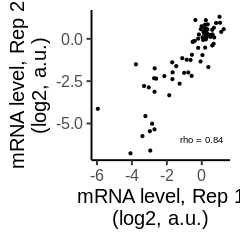

In [59]:
options(repr.plot.width=2, repr.plot.height=2)

plot_data <- insert_lfc %>% 
  filter(str_detect(insert_name, "varydicodonrepeatlength")) %>% 
  separate(insert_name, c("insert_type", "dicodon", "repeat_length")) %>% 
  # we skip these two dicodons and plot them separately since they are peculiar
  filter(!dicodon %in% c("AGAGAG", "CTCATA")) %>%
  mutate(diaa = as.character(translate(DNAStringSet(dicodon,), no.init.codon = T))) %>% 
  group_by(diaa) %>%
  mutate(temp = min(mean_lfc[repeat_length == "8"])) %>%
  ungroup() %>%
  filter(temp < -0.5) %>% 
  select(replicate, lfc, diaa, repeat_length) %>% 
  mutate(replicate = as.character(replicate)) %>% 
  pivot_wider(names_from = replicate, values_from = lfc, names_prefix = "lfc_") %>%
  print()

plot_data %>% 
  ggplot(aes(x = lfc_1, y = lfc_2)) +
  geom_point(size = 0.5) +
  labs(x = "mRNA level, Rep 1\n(log2, a.u.)", y = "mRNA level, Rep 2\n(log2, a.u.)") +
  annotate("text", x=0, y=-6, label="rho = 0.84", size = 2)

## Read in data from Pool1 8x Dicodon experiment

- Adjust such that we can use this as an additioanl replciate for plotting 8x dicodon test effects 

In [60]:
all_8xdiaa_data <- read_tsv("../../pool1_mrna/tables/8xdipeptide_lfc.tsv.gz") %>% 
  select(count_grna, count_mrna, n_barcodes_grna, n_barcodes_mrna, diaa) %>% 
  group_by(diaa) %>%
  summarize_all(sum) %>%
  ungroup() %>%
  mutate(lfc = log2(count_mrna / count_grna)) %>%
  mutate(lfc = lfc -  median(lfc)) %>%
  arrange(lfc) %>%
  mutate(diaa1 = diaa, diaa2 = diaa, repeat_length = 8) %>% 
  mutate(insert = strrep(diaa, 8)) %>%
  select(diaa1, diaa2, lfc, repeat_length, insert) %>%
  mutate(experiment = 1, replicate = 1) %>% 
  print()


Rows: 441 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (6): dicodon, diaa, codon1, codon2, aa1, aa2
dbl (6): insert_num, count_grna, count_mrna, n_barcodes_grna, n_barcodes_mrn...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 441 × 7
   diaa1 diaa2   lfc repeat_length insert           experiment replicate
   <chr> <chr> <dbl>         <dbl> <chr>                 <dbl>     <dbl>
 1 G*    G*    -3.04             8 G*G*G*G*G*G*G*G*          1         1
 2 YK    YK    -2.67             8 YKYKYKYKYKYKYKYK          1         1
 3 RH    RH    -2.66             8 RHRHRHRHRHRHRHRH          1         1
 4 T*    T*    -2.41             8 T*T*T*T*T*T*T*T*          1         1
 5 HR    HR    -2.39             8 HRHRHRHRHRHRHRHR          1         1
 6 R*    R*    -2.32             8 R*R*R*R*R*R*R*R*          1         1
 7 II    II    -2.30             8 IIIIIIIIIIIIIIII          1         1
 8 VK    VK    -2.26             8 VKVKVKVKVKVKVKVK          1         1
 9 KV    KV    -2.23             8 KVKVKVKVKVKVKVKV          1         1
10 KI    KI    -2.18             8 KIKIKIKIKIKIKIKI          1         1
# … with 431 more rows


## Plot RH combination effects

### Parse all RH + HR combinations

In [61]:
plot_data <- insert_lfc %>% 
  # Grab dicodon combination mixtures, plus the RH8 insert
  filter(str_detect(insert_name, "mixdicodons") | insert == "RHRHRHRHRHRHRHRH") %>%
  separate(insert_name, c("insert_type", "dicodon1", "dicodon2", "repeat_length")) %>%
  mutate(dicodon2 = if_else(is.na(repeat_length), dicodon1, dicodon2)) %>% 
  mutate(repeat_length = if_else(is.na(repeat_length), 8, as.numeric(repeat_length))) %>%
  type_convert() %>%
  mutate(diaa1 = as.character(translate(DNAStringSet(dicodon1), no.init.codon = T))) %>%
  mutate(diaa2 = as.character(translate(DNAStringSet(dicodon2), no.init.codon = T))) %>%
  select(-dicodon1, -dicodon2, -insert_type, -mean_lfc, -matches("n_barcodes|count")) %>%
  # pivot_wider(names_from = "repeat_length", values_from = c("mean_lfc", "insert")) %>%
  # arrange(mean_lfc_1 + mean_lfc_2 + mean_lfc_4) %>%
  mutate(experiment = 2) %>% 
  print()

Warning message:
“Expected 4 pieces. Missing pieces filled with `NA` in 2 rows [1, 2].”

── Column specification ────────────────────────────────────────────────────────
cols(
  seq = col_character(),
  insert_type = col_character(),
  dicodon1 = col_character(),
  dicodon2 = col_character(),
  insert = col_character()
)



# A tibble: 182 × 9
   replicate   lfc lfc_sd seq        repeat_length insert diaa1 diaa2 experiment
       <dbl> <dbl>  <dbl> <chr>              <dbl> <chr>  <chr> <chr>      <dbl>
 1         1 -4.08  1.08  CGCCATCGC…             8 RHRHR… RH    RH             2
 2         2 -6.76  1.06  CGCCATCGC…             8 RHRHR… RH    RH             2
 3         1 -2.82  0.593 GTCAAAGTC…             4 VKVKV… VK    SF             2
 4         2 -5.99  1.39  GTCAAAGTC…             4 VKVKV… VK    SF             2
 5         1 -4.43  0.962 TTCAGTGTC…             1 FSVKF… FS    VK             2
 6         2 -4.18  0.811 TTCAGTGTC…             1 FSVKF… FS    VK             2
 7         1 -3.33  0.505 TTCAGTTTC…             4 FSFSF… FS    KV             2
 8         2 -4.36  0.702 TTCAGTTTC…             4 FSFSF… FS    KV             2
 9         1 -3.96  0.637 GTCAAATTC…             1 VKFSV… VK    FS             2
10         2 -3.72  1.28  GTCAAATTC…             1 VKFSV… VK    FS             2
# … with

### Plot  mRNA level of RH + HR combinations

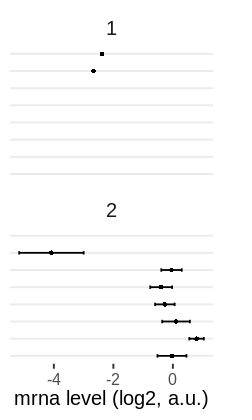

In [62]:
options(repr.plot.width=2.1, repr.plot.height=3.5)

plot_data2 <- plot_data %>% 
  bind_rows(all_8xdiaa_data) %>% 
  filter(diaa1 %in% c("HR", "RH"), diaa2 %in% c("RH", "HR")) %>% 
  mutate(insert = fct_rev(fct_reorder(insert, -repeat_length))) %>% 
  filter(replicate == 1) %>% 
  group_by(insert, repeat_length) %>% 
  mutate(num = group_indices())

plot1 <- plot_data2 %>% 
  ggplot(aes(x = lfc, y = num, shape = as.factor(replicate),
             xmin = lfc - lfc_sd, xmax = lfc + lfc_sd,
             )) +
  facet_wrap(~experiment, ncol = 1, scales = "fixed") +
  scale_y_continuous(position = "right", breaks = seq(1,8)) +
  # scale_color_manual(values = cbPalette[2:3]) +
  labs(color = "", y = "", x = "mrna level (log2, a.u.)") +
  geom_errorbar(width=0.2) +
  geom_point(size=1) +
  theme(axis.text.y = element_blank(), 
        axis.ticks.y = element_blank(), 
        panel.grid.major.y = element_line(),
        axis.line = element_blank(),
        legend.position = "none") +
  NULL
plot1

### Write RH + HR combinations to highlight pattern of variation

Warning message:
“`cols` is now required when using unnest().
Please use `cols = c(insert)`”


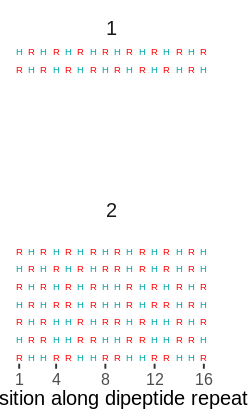

In [63]:
options(repr.plot.width=2.1, repr.plot.height=3.5)

plot2 <- plot_data2 %>% 
  select(num, replicate, repeat_length, experiment, insert) %>% 
  mutate(insert = str_split(insert, "")) %>% 
  mutate(insert = map(insert, enframe)) %>% 
  # rowwise() %>% 
  unnest() %>%
  rename(pos = name, aa = value) %>% 
  ggplot(aes(x = pos, y = num, color = aa, label = aa)) +
  facet_wrap(~experiment, ncol = 1, scales = "fixed") +
  geom_text(size = 2) +
  scale_y_continuous(position = "right") +
  scale_x_continuous(breaks = c(1,4,8,12,16)) +
  scale_color_manual(values = c("#00a5a7", "#ff0000")) +
  theme(axis.text.y = element_blank(), 
        axis.ticks.y = element_blank(), 
        axis.line = element_blank(),
        legend.position = "none") +
  labs(y = "", x = "Position along dipeptide repeat")
plot2

### Make a joint plot of RH-HR combination


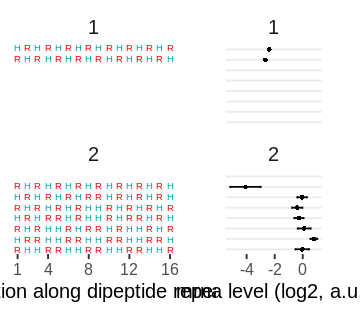

In [64]:
options(repr.plot.width=3, repr.plot.height=2.6)

cowplot::plot_grid(plot2, plot1, rel_widths = c(3,2))

ggsave("../figures/RH_HR_mix.pdf", width = 3, height = 2.6)


## Plot VK combination effects

### Parse VK combinations

In [65]:

plot_data <- insert_lfc %>% 
  filter(str_detect(insert_name, "mixdicodons") | insert == "VKVKVKVKVKVKVKVK" | insert == "KVKVKVKVKVKVKVKV") %>% 
  separate(insert_name, c("insert_type", "dicodon1", "dicodon2", "repeat_length")) %>%
  mutate(dicodon2 = if_else(is.na(repeat_length), dicodon1, dicodon2)) %>% 
  mutate(repeat_length = if_else(is.na(repeat_length), 8, as.numeric(repeat_length))) %>%
  type_convert() %>%
  mutate(diaa1 = as.character(translate(DNAStringSet(dicodon1), no.init.codon = T))) %>%
  mutate(diaa2 = as.character(translate(DNAStringSet(dicodon2), no.init.codon = T))) %>%
  select(-dicodon1, -dicodon2, -insert_type, -mean_lfc, -matches("n_barcodes|count")) %>%
  # pivot_wider(names_from = "repeat_length", values_from = c("mean_lfc", "insert")) %>%
  # arrange(mean_lfc_1 + mean_lfc_2 + mean_lfc_4) %>%
  mutate(experiment = 2) %>% 
  print()


Warning message:
“Expected 4 pieces. Missing pieces filled with `NA` in 2 rows [23, 24].”

── Column specification ────────────────────────────────────────────────────────
cols(
  seq = col_character(),
  insert_type = col_character(),
  dicodon1 = col_character(),
  dicodon2 = col_character(),
  insert = col_character()
)



# A tibble: 182 × 9
   replicate   lfc lfc_sd seq        repeat_length insert diaa1 diaa2 experiment
       <dbl> <dbl>  <dbl> <chr>              <dbl> <chr>  <chr> <chr>      <dbl>
 1         1 -2.82  0.593 GTCAAAGTC…             4 VKVKV… VK    SF             2
 2         2 -5.99  1.39  GTCAAAGTC…             4 VKVKV… VK    SF             2
 3         1 -4.43  0.962 TTCAGTGTC…             1 FSVKF… FS    VK             2
 4         2 -4.18  0.811 TTCAGTGTC…             1 FSVKF… FS    VK             2
 5         1 -3.33  0.505 TTCAGTTTC…             4 FSFSF… FS    KV             2
 6         2 -4.36  0.702 TTCAGTTTC…             4 FSFSF… FS    KV             2
 7         1 -3.96  0.637 GTCAAATTC…             1 VKFSV… VK    FS             2
 8         2 -3.72  1.28  GTCAAATTC…             1 VKFSV… VK    FS             2
 9         1 -4.34  0.781 AGTTTCAAA…             1 SFKVS… SF    KV             2
10         2 -3.28  0.626 AGTTTCAAA…             1 SFKVS… SF    KV             2
# … with

### Plot  mRNA level of VK + KV combinations


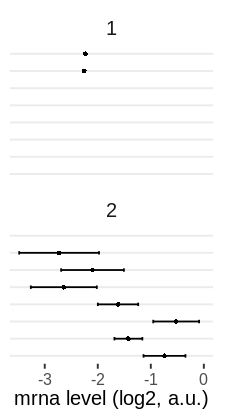

In [66]:
options(repr.plot.width=2.1, repr.plot.height=3.5)

plot_data2 <- plot_data %>% 
  bind_rows(all_8xdiaa_data) %>% 
  filter(diaa1 %in% c("VK", "KV"), diaa2 %in% c("VK", "KV")) %>% 
  mutate(insert = fct_rev(fct_reorder(insert, -repeat_length))) %>% 
  filter(replicate == 1) %>% 
  group_by(insert, repeat_length) %>% 
  mutate(num = group_indices())

plot1 <- plot_data2 %>% 
  ggplot(aes(x = lfc, y = num, shape = as.factor(replicate),
             xmin = lfc - lfc_sd, xmax = lfc + lfc_sd,
             )) +
  facet_wrap(~experiment, ncol = 1, scales = "fixed") +
  scale_y_continuous(position = "right", breaks = seq(1,8)) +
  scale_x_continuous(limits = c(NA, 0)) + 
  # scale_color_manual(values = cbPalette[2:3]) +
  labs(color = "", y = "", x = "mrna level (log2, a.u.)") +
  geom_errorbar(width=0.2) +
  geom_point(size=1) +
  theme(axis.text.y = element_blank(), 
        axis.ticks.y = element_blank(), 
        panel.grid.major.y = element_line(),
        axis.line = element_blank(),
        legend.position = "none") +
  NULL
plot1


### Write VK + KV combinations to highlight pattern of variation

Warning message:
“`cols` is now required when using unnest().
Please use `cols = c(insert)`”


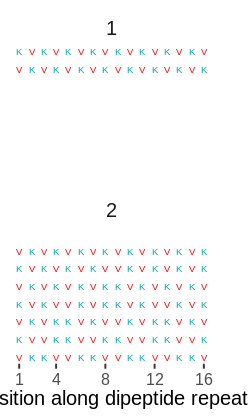

In [67]:
options(repr.plot.width=2.1, repr.plot.height=3.5)

plot2 <- plot_data2 %>% 
  select(num, replicate, repeat_length, experiment, insert) %>% 
  mutate(insert = str_split(insert, "")) %>% 
  mutate(insert = map(insert, enframe)) %>% 
  # rowwise() %>% 
  unnest() %>%
  rename(pos = name, aa = value) %>% 
  ggplot(aes(x = pos, y = num, color = aa, label = aa)) +
  facet_wrap(~experiment, ncol = 1, scales = "fixed") +
  geom_text(size = 2) +
  scale_y_continuous(position = "right") +
  scale_x_continuous(breaks = c(1,4,8,12,16)) +
  scale_color_manual(values = c("#00a5a7", "#ff0000")) +
  theme(axis.text.y = element_blank(), 
        axis.ticks.y = element_blank(), 
        axis.line = element_blank(),
        legend.position = "none") +
  labs(y = "", x = "Position along dipeptide repeat")
plot2


### Make a joint plot of VK-KV combination

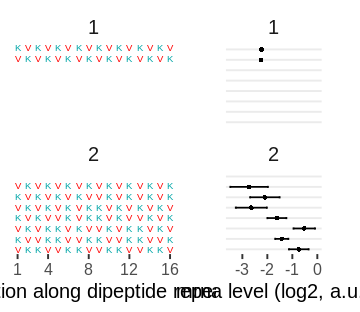

In [68]:
options(repr.plot.width=3, repr.plot.height=2.6)

cowplot::plot_grid(plot2, plot1, rel_widths = c(3,2))

ggsave("../figures/VK_KV_mix.pdf", width = 3, height = 2.6)

## Plot SF combination effects


### Parse all SF + FS combinations


In [69]:

plot_data <- insert_lfc %>% 
  filter(str_detect(insert_name, "mixdicodons") | insert == "FSFSFSFSFSFSFSFS" | insert == "SFSFSFSFSFSFSFSF") %>% 
  separate(insert_name, c("insert_type", "dicodon1", "dicodon2", "repeat_length")) %>%
  mutate(dicodon2 = if_else(is.na(repeat_length), dicodon1, dicodon2)) %>% 
  mutate(repeat_length = if_else(is.na(repeat_length), 8, as.numeric(repeat_length))) %>%
  type_convert() %>%
  mutate(diaa1 = as.character(translate(DNAStringSet(dicodon1), no.init.codon = T))) %>%
  mutate(diaa2 = as.character(translate(DNAStringSet(dicodon2), no.init.codon = T))) %>%
  select(-dicodon1, -dicodon2, -insert_type, -mean_lfc, -matches("n_barcodes|count")) %>%
  # pivot_wider(names_from = "repeat_length", values_from = c("mean_lfc", "insert")) %>%
  # arrange(mean_lfc_1 + mean_lfc_2 + mean_lfc_4) %>%
  mutate(experiment = 2) %>% 
  print()

Warning message:
“Expected 4 pieces. Missing pieces filled with `NA` in 2 rows [33, 34].”

── Column specification ────────────────────────────────────────────────────────
cols(
  seq = col_character(),
  insert_type = col_character(),
  dicodon1 = col_character(),
  dicodon2 = col_character(),
  insert = col_character()
)



# A tibble: 182 × 9
   replicate   lfc lfc_sd seq        repeat_length insert diaa1 diaa2 experiment
       <dbl> <dbl>  <dbl> <chr>              <dbl> <chr>  <chr> <chr>      <dbl>
 1         1 -2.82  0.593 GTCAAAGTC…             4 VKVKV… VK    SF             2
 2         2 -5.99  1.39  GTCAAAGTC…             4 VKVKV… VK    SF             2
 3         1 -4.43  0.962 TTCAGTGTC…             1 FSVKF… FS    VK             2
 4         2 -4.18  0.811 TTCAGTGTC…             1 FSVKF… FS    VK             2
 5         1 -3.33  0.505 TTCAGTTTC…             4 FSFSF… FS    KV             2
 6         2 -4.36  0.702 TTCAGTTTC…             4 FSFSF… FS    KV             2
 7         1 -3.96  0.637 GTCAAATTC…             1 VKFSV… VK    FS             2
 8         2 -3.72  1.28  GTCAAATTC…             1 VKFSV… VK    FS             2
 9         1 -4.34  0.781 AGTTTCAAA…             1 SFKVS… SF    KV             2
10         2 -3.28  0.626 AGTTTCAAA…             1 SFKVS… SF    KV             2
# … with

### Plot  mRNA level of SF + FS combinations
```{r, fig.width=2, fig.height=3.5}

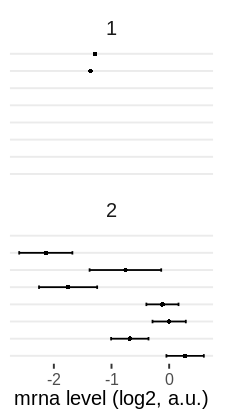

In [70]:
options(repr.plot.width=2.1, repr.plot.height=3.5)

plot_data2 <- plot_data %>% 
  bind_rows(all_8xdiaa_data) %>% 
  filter(diaa1 %in% c("SF", "FS"), diaa2 %in% c("SF", "FS")) %>% 
  mutate(insert = fct_rev(fct_reorder(insert, -repeat_length))) %>% 
  filter(replicate == 1) %>%
  group_by(insert, repeat_length) %>% 
  mutate(num = group_indices())

plot1 <- plot_data2 %>% 
  ggplot(aes(x = lfc, y = num, shape = as.factor(replicate),
             xmin = lfc - lfc_sd, xmax = lfc + lfc_sd,
             )) +
  facet_wrap(~experiment, ncol = 1, scales = "fixed") +
  scale_y_continuous(position = "right", breaks = seq(1,8)) +
  # scale_x_continuous(limits = c(NA, 0)) + 
  # scale_color_manual(values = cbPalette[2:3]) +
  labs(color = "", y = "", x = "mrna level (log2, a.u.)") +
  geom_errorbar(width=0.2) +
  geom_point(size=1) +
  theme(axis.text.y = element_blank(), 
        axis.ticks.y = element_blank(), 
        panel.grid.major.y = element_line(),
        axis.line = element_blank(),
        legend.position = "none") +
  NULL
plot1

### Write SF + FS combinations to highlight pattern of variation

```{r, fig.width=2.1, fig.height=3.5}

Warning message:
“`cols` is now required when using unnest().
Please use `cols = c(insert)`”


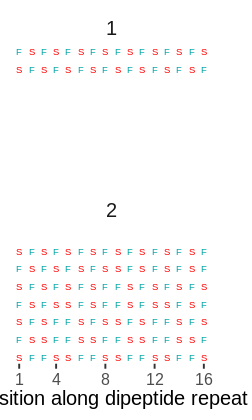

In [71]:
options(repr.plot.width=2.1, repr.plot.height=3.5)

plot2 <- plot_data2 %>% 
  select(num, replicate, repeat_length, experiment, insert) %>% 
  mutate(insert = str_split(insert, "")) %>% 
  mutate(insert = map(insert, enframe)) %>% 
  # rowwise() %>% 
  unnest() %>%
  rename(pos = name, aa = value) %>% 
  ggplot(aes(x = pos, y = num, color = aa, label = aa)) +
  facet_wrap(~experiment, ncol = 1, scales = "fixed") +
  geom_text(size = 2) +
  scale_y_continuous(position = "right") +
  scale_x_continuous(breaks = c(1,4,8,12,16)) +
  scale_color_manual(values = c("#00a5a7", "#ff0000")) +
  theme(axis.text.y = element_blank(), 
        axis.ticks.y = element_blank(), 
        axis.line = element_blank(),
        legend.position = "none") +
  labs(y = "", x = "Position along dipeptide repeat")
plot2


### Make a joint plot of SF-FS combination

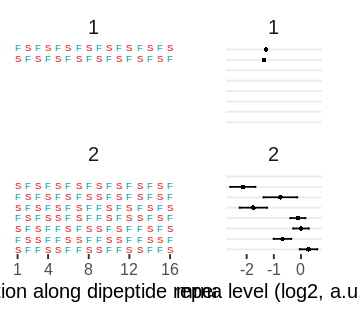

In [72]:
options(repr.plot.width=3, repr.plot.height=2.6)

cowplot::plot_grid(plot2, plot1, rel_widths = c(3,2))

ggsave("../figures/SF_FS_mix.pdf", width = 3, height = 2.6)


## Plot SF + VK alpha combinations

- Combinations form alpha helicies or beta strands  

### Parse all SF + VK alternating combinations

In [73]:

plot_data <- insert_lfc %>% 
  filter(str_detect(insert_name, "mixdicodons") | insert %in% c("SFSFSFSFSFSFSFSF", "VKVKVKVKVKVKVKVK")) %>% 
  separate(insert_name, c("insert_type", "dicodon1", "dicodon2", "repeat_length")) %>%
  mutate(dicodon2 = if_else(is.na(repeat_length), dicodon1, dicodon2)) %>% 
  mutate(repeat_length = if_else(is.na(repeat_length), 8, as.numeric(repeat_length))) %>%
  type_convert() %>%
  mutate(diaa1 = as.character(translate(DNAStringSet(dicodon1), no.init.codon = T))) %>%
  mutate(diaa2 = as.character(translate(DNAStringSet(dicodon2), no.init.codon = T))) %>%
  # select(-dicodon1, -dicodon2, -insert_type, -mean_lfc, -matches("n_barcodes|count")) %>%
  # pivot_wider(names_from = "repeat_length", values_from = c("mean_lfc", "insert")) %>%
  # arrange(mean_lfc_1 + mean_lfc_2 + mean_lfc_4) %>%
  mutate(experiment = 2) %>%
  arrange(repeat_length) %>%
  # filter(str_detect(insert, "SV|SK")) %>% 
  print()

Warning message:
“Expected 4 pieces. Missing pieces filled with `NA` in 4 rows [23, 24, 35, 36].”

── Column specification ────────────────────────────────────────────────────────
cols(
  seq = col_character(),
  insert_type = col_character(),
  dicodon1 = col_character(),
  dicodon2 = col_character(),
  insert = col_character()
)



# A tibble: 184 × 13
   replicate   lfc lfc_sd seq        insert_type dicodon1 dicodon2 repeat_length
       <dbl> <dbl>  <dbl> <chr>      <chr>       <chr>    <chr>            <dbl>
 1         1 -4.43  0.962 TTCAGTGTC… mixdicodons TTCAGT   GTCAAA               1
 2         2 -4.18  0.811 TTCAGTGTC… mixdicodons TTCAGT   GTCAAA               1
 3         1 -3.96  0.637 GTCAAATTC… mixdicodons GTCAAA   TTCAGT               1
 4         2 -3.72  1.28  GTCAAATTC… mixdicodons GTCAAA   TTCAGT               1
 5         1 -4.34  0.781 AGTTTCAAA… mixdicodons AGTTTC   AAAGTC               1
 6         2 -3.28  0.626 AGTTTCAAA… mixdicodons AGTTTC   AAAGTC               1
 7         1 -4.14  1.53  AAAGTCAGT… mixdicodons AAAGTC   AGTTTC               1
 8         2 -3.25  0.719 AAAGTCAGT… mixdicodons AAAGTC   AGTTTC               1
 9         1 -1.42  0.263 AAAGTCGTC… mixdicodons AAAGTC   GTCAAA               1
10         2 -1.41  0.427 AAAGTCGTC… mixdicodons AAAGTC   GTCAAA               1
# … wit

In [74]:
### Plot  mRNA level of SFVKx4 combinations

# A tibble: 8 × 15
# Groups:   insert [8]
  replicate     lfc lfc_sd seq       insert_type dicodon1 dicodon2 repeat_length
      <dbl>   <dbl>  <dbl> <chr>     <chr>       <chr>    <chr>            <dbl>
1         1 -4.43    0.962 TTCAGTGT… mixdicodons TTCAGT   GTCAAA               1
2         1 -3.96    0.637 GTCAAATT… mixdicodons GTCAAA   TTCAGT               1
3         1 -4.34    0.781 AGTTTCAA… mixdicodons AGTTTC   AAAGTC               1
4         1 -4.14    1.53  AAAGTCAG… mixdicodons AAAGTC   AGTTTC               1
5         1 -0.585   0.288 AGTTTCGT… mixdicodons AGTTTC   GTCAAA               1
6         1 -0.0383  0.193 GTCAAAAG… mixdicodons GTCAAA   AGTTTC               1
7         1 -0.229   0.298 AAAGTCTT… mixdicodons AAAGTC   TTCAGT               1
8         1  0.538   0.320 TTCAGTAA… mixdicodons TTCAGT   AAAGTC               1
# … with 7 more variables: mean_lfc <dbl>, insert <fct>, diaa1 <chr>,
#   diaa2 <chr>, experiment <dbl>, num <int>, strand <lgl>


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


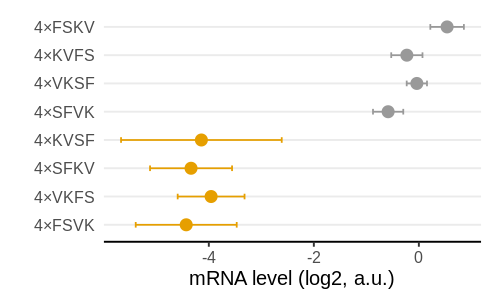

In [75]:
options(repr.plot.width=4.1, repr.plot.height=2.5)

plot_data2 <- plot_data %>% 
  bind_rows(all_8xdiaa_data) %>% 
  filter((diaa1 %in% c("VK", "KV") & diaa2 %in% c("SF", "FS")) | 
         (diaa2 %in% c("VK", "KV") & diaa1 %in% c("SF", "FS")) | 
         (diaa1 == diaa2 & diaa1 %in% c("VK", "KV", "SF", "FS"))) %>% 
  filter(repeat_length <= 1 | repeat_length >=9) %>% 
  mutate(insert = fct_rev(fct_reorder(paste0("4×", substr(insert, 1, 4)), -lfc))) %>% 
  # mutate(diaa1 = fct_relevel(diaa1, "SF", "FS", "VK", "KV")) %>% 
  # mutate(diaa2 = fct_relevel(diaa2, "SF", "FS", "VK", "KV")) %>% 
  # group_by(repeat_length, diaa1, diaa2) %>% 
  filter(replicate == 1) %>% 
  group_by(insert) %>% 
  mutate(num = group_indices()) %>% 
  mutate(strand = if_else(str_detect(insert, "KVSF|VKFS|SFKV|FSVK"), T, F)) %>% 
  print()

plot1 <- plot_data2 %>% 
  ggplot(aes(x = lfc, y = insert, color = strand,
             xmin = lfc - lfc_sd, xmax = lfc + lfc_sd)) +
  # scale_y_continuous(position = "right", breaks = seq(1,12)) +
  scale_x_continuous(breaks = seq(-6, 0, 2)) +
  scale_color_manual(values = cbPalette[1:2]) +
  labs(color = "", y = "", x = "mRNA level (log2, a.u.)", shape = "replicate") +
  geom_errorbar(width = 0.2) +
  geom_point(size = 3) +
  theme(axis.ticks.y = element_blank(), 
        panel.grid.major.y = element_line(),
        axis.line.y = element_blank(),
        legend.position = "right") +
  guides(color = F) +
  NULL

ggsave("../figures/SVKF_mrna_levels.pdf", width = 4.1, height = 2.5)

plot1